You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
diabetes_data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Get descriptive statistics for the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 1500x1000 with 0 Axes>

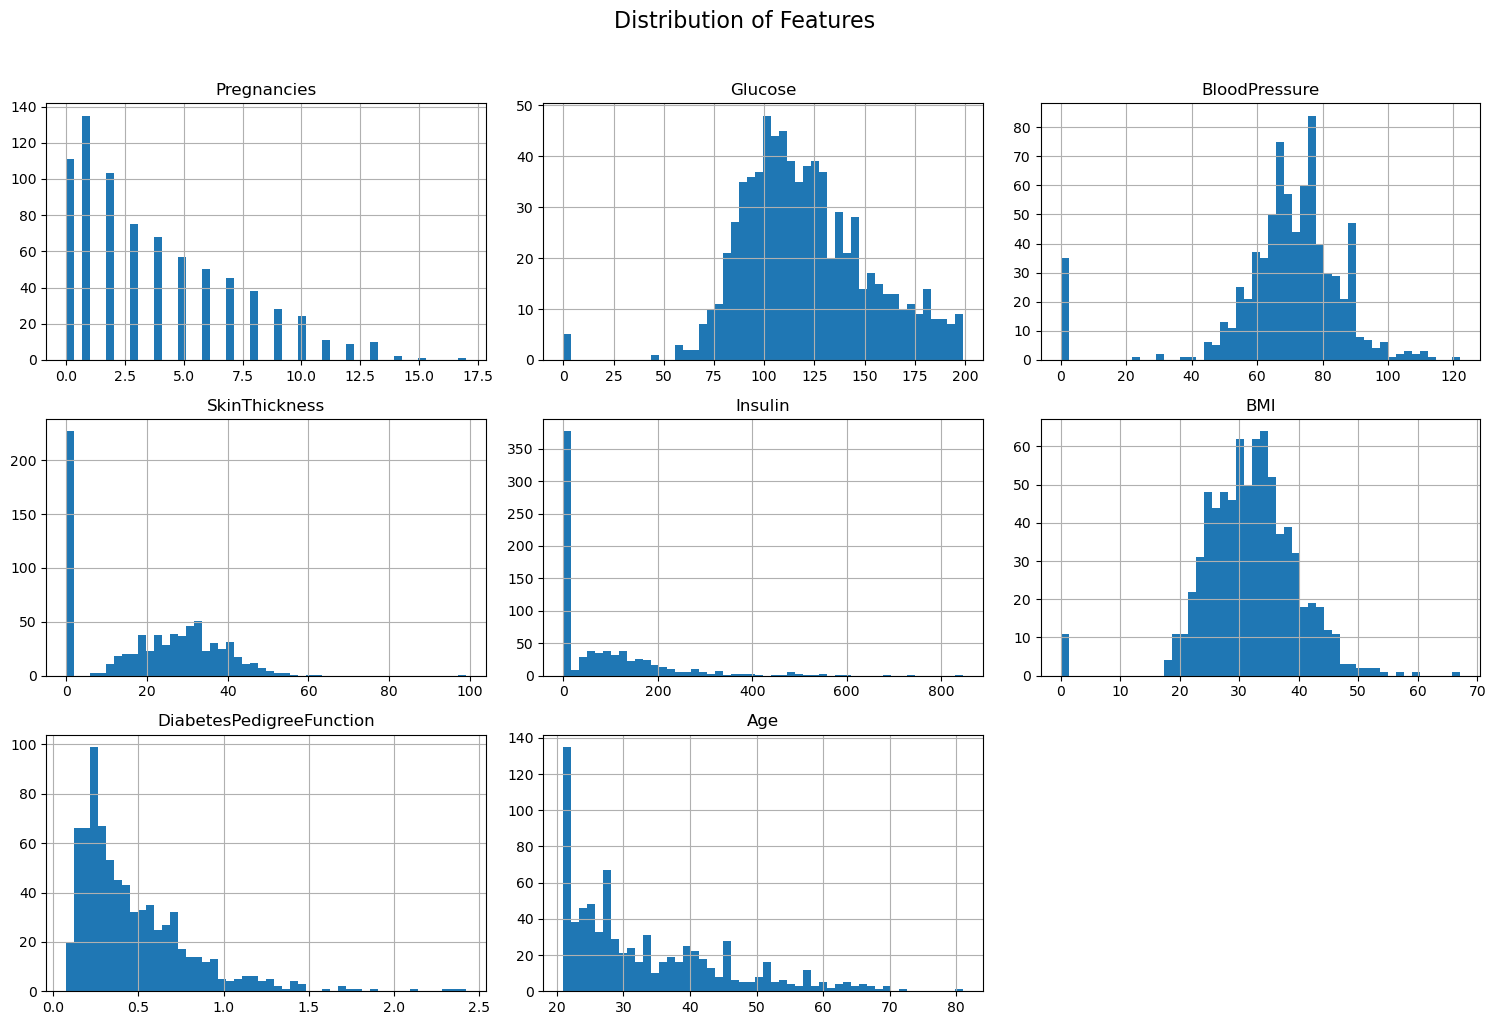

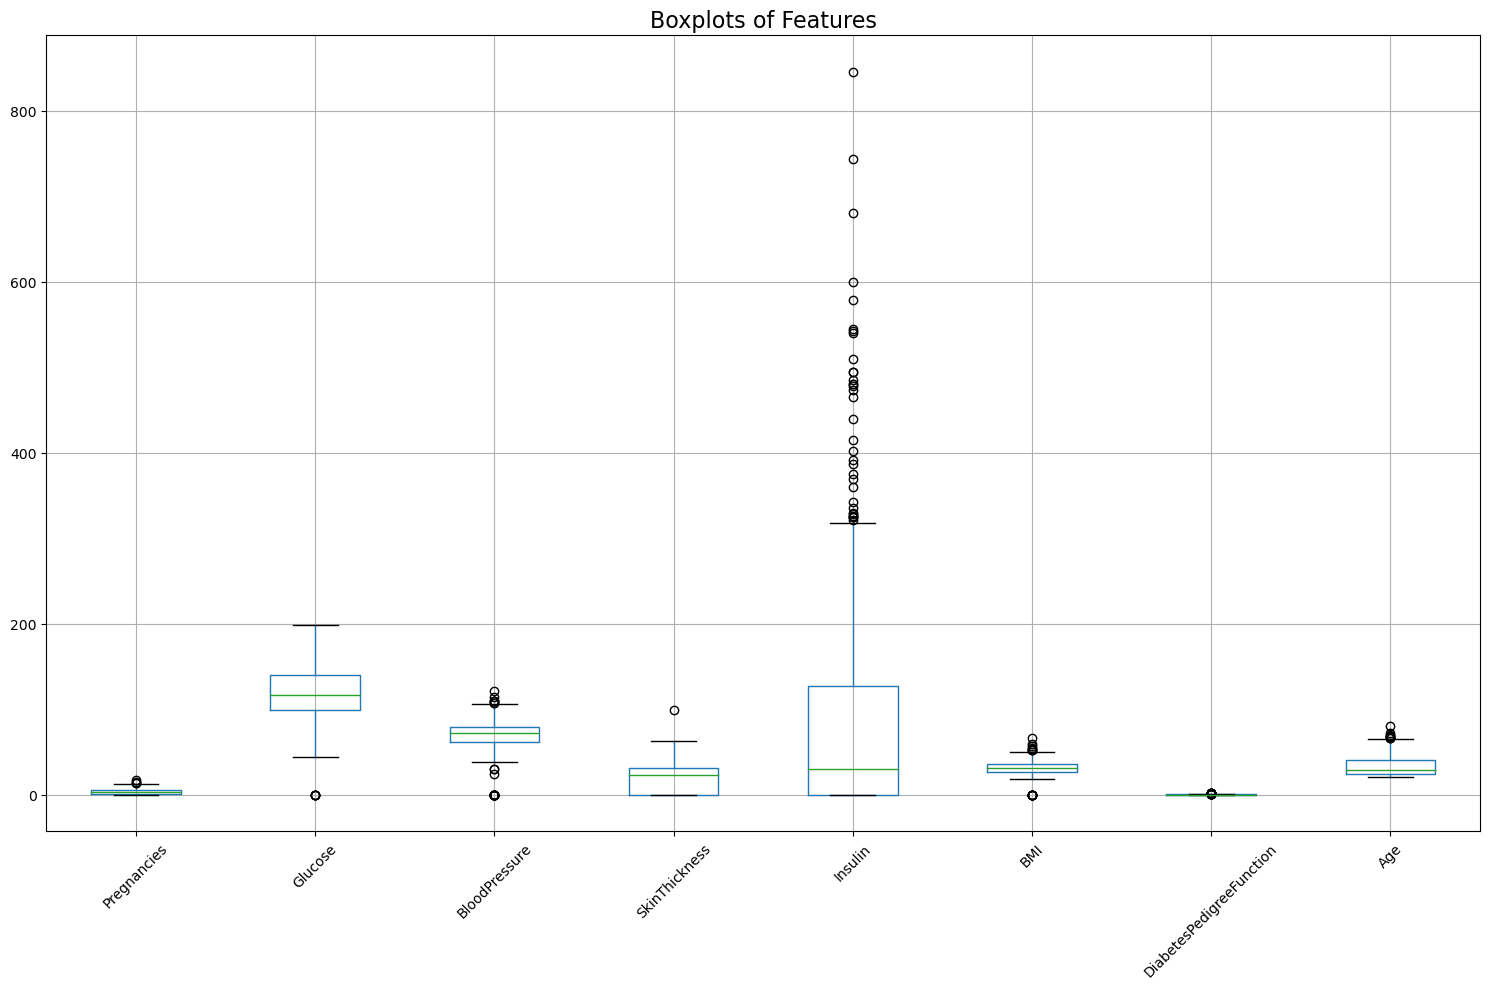

In [3]:
# Set up the figure size
plt.figure(figsize=(15, 10))

# Plot histograms for each variable
diabetes_data.drop('Outcome', axis=1).hist(bins=50, figsize=(15,10))
plt.suptitle('Distribution of Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Plot boxplots for each variable to identify potential outliers
plt.figure(figsize=(15, 10))
diabetes_data.drop('Outcome', axis=1).boxplot()
plt.title('Boxplots of Features', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [4]:
# Replace zero values with NaN for columns where zero is likely a placeholder for missing data
columns_with_missing_values = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
diabetes_data[columns_with_missing_values] = diabetes_data[columns_with_missing_values].replace(0, pd.NA)

# Check the number of missing values in each column
missing_values = diabetes_data.isna().sum()
missing_values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
# Impute missing values with the median
diabetes_data.fillna(diabetes_data.median(), inplace=True)

# Check if all missing values have been imputed
missing_after_imputation = diabetes_data.isna().sum()
missing_after_imputation

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Identify outliers using the IQR method

# Calculate Q1 and Q3 for each column
Q1 = diabetes_data.quantile(0.25)
Q3 = diabetes_data.quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the number of outliers in each column
outliers = ((diabetes_data < lower_bound) | (diabetes_data > upper_bound)).sum()
outliers

Pregnancies                   4
Glucose                       0
BloodPressure                14
SkinThickness                87
Insulin                     346
BMI                           8
DiabetesPedigreeFunction     29
Age                           9
Outcome                       0
dtype: int64

In [7]:
# Cap outliers at the lower and upper bounds
diabetes_data = diabetes_data.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Check if outliers have been capped
outliers_after_capping = ((diabetes_data < lower_bound) | (diabetes_data > upper_bound)).sum()
outliers_after_capping

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [8]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = diabetes_data.drop("Outcome", axis=1)
y = diabetes_data["Outcome"]

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the size of the training and test sets
X_train.shape, X_test.shape

((537, 8), (231, 8))

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to optimize
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Train the model with the best parameters on the entire training set
best_tree = DecisionTreeClassifier(**best_params, random_state=42)
best_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
y_probabilities = best_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = roc_auc_score(y_test, y_probabilities)

accuracy, precision, recall, f1, conf_matrix, roc_auc


(0.7186147186147186,
 0.7142857142857143,
 0.3125,
 0.43478260869565216,
 array([[141,  10],
        [ 55,  25]], dtype=int64),
 0.7531870860927152)

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

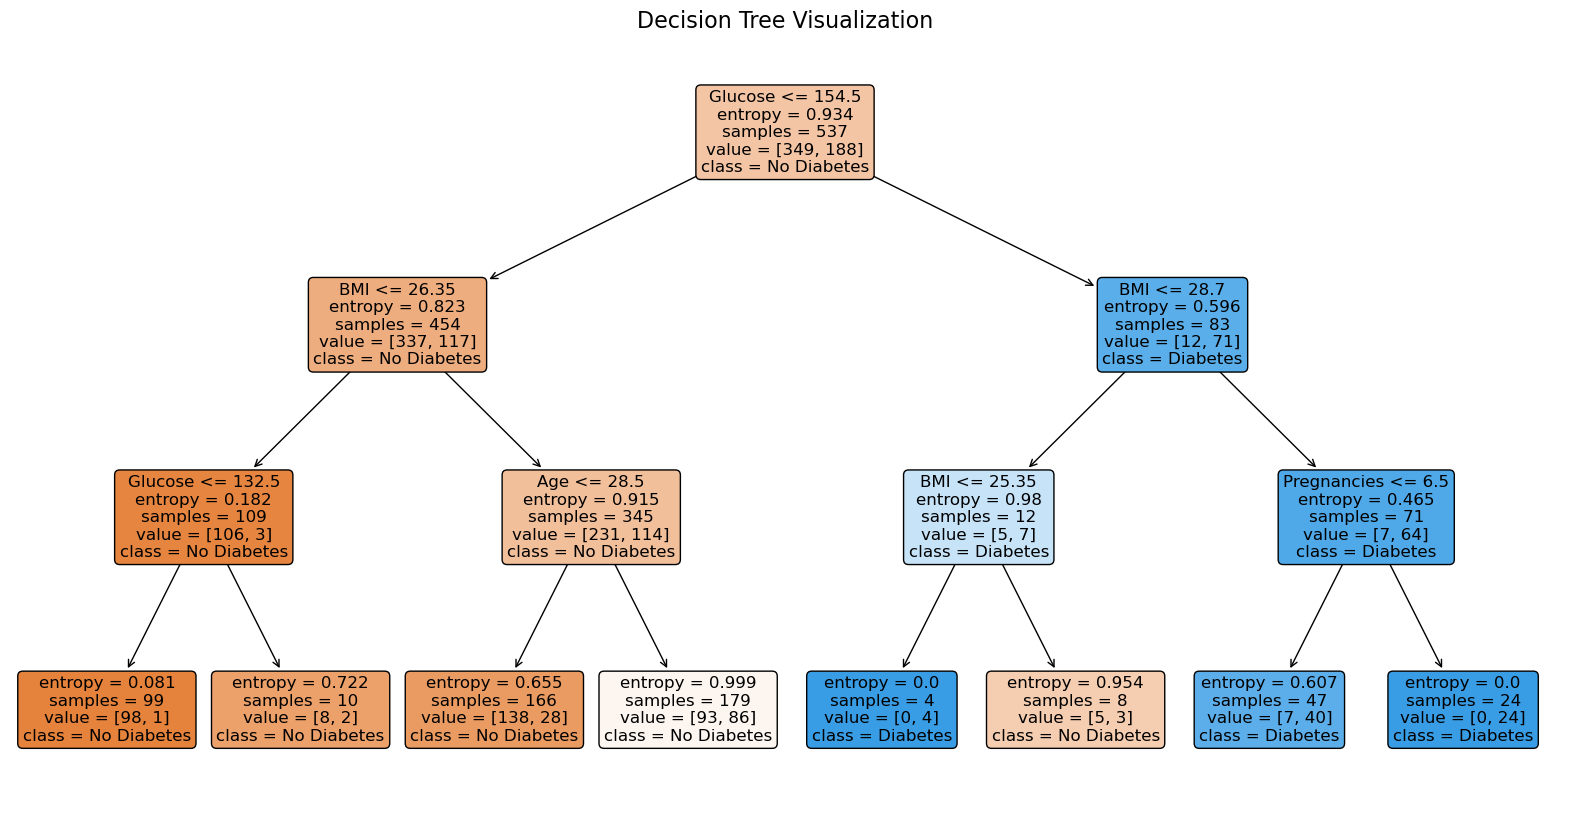

In [11]:
from sklearn.tree import plot_tree

# Set up the figure size
plt.figure(figsize=(20, 10))

# Visualize the decision tree
plot_tree(best_tree, feature_names=X_train.columns, class_names=["No Diabetes", "Diabetes"], filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()

In [12]:
# Extract feature importances
feature_importances = best_tree.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
1,Glucose,0.509702
5,BMI,0.288895
7,Age,0.174093
0,Pregnancies,0.027310
2,BloodPressure,0.000000
3,SkinThickness,0.000000
4,Insulin,0.000000
6,DiabetesPedigreeFunction,0.000000


# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [13]:
# Sensitivity analysis for Glucose, BMI, and Age

# Create perturbed datasets
X_test_higher_glucose = X_test.copy()
X_test_higher_glucose['Glucose'] *= 1.10

X_test_lower_glucose = X_test.copy()
X_test_lower_glucose['Glucose'] *= 0.90

X_test_higher_bmi = X_test.copy()
X_test_higher_bmi['BMI'] *= 1.10

X_test_lower_bmi = X_test.copy()
X_test_lower_bmi['BMI'] *= 0.90

X_test_older_age = X_test.copy()
X_test_older_age['Age'] *= 1.10

X_test_younger_age = X_test.copy()
X_test_younger_age['Age'] *= 0.90

# Make predictions for each perturbed dataset
y_pred_higher_glucose = best_tree.predict(X_test_higher_glucose)
y_pred_lower_glucose = best_tree.predict(X_test_lower_glucose)

y_pred_higher_bmi = best_tree.predict(X_test_higher_bmi)
y_pred_lower_bmi = best_tree.predict(X_test_lower_bmi)

y_pred_older_age = best_tree.predict(X_test_older_age)
y_pred_younger_age = best_tree.predict(X_test_younger_age)

# Calculate the change in predictions for each feature
change_in_pred_glucose = ((y_pred != y_pred_higher_glucose).sum(), (y_pred != y_pred_lower_glucose).sum())
change_in_pred_bmi = ((y_pred != y_pred_higher_bmi).sum(), (y_pred != y_pred_lower_bmi).sum())
change_in_pred_age = ((y_pred != y_pred_older_age).sum(), (y_pred != y_pred_younger_age).sum())

change_in_pred_glucose, change_in_pred_bmi, change_in_pred_age

((19, 19), (5, 7), (0, 0))

In [14]:
# Define hypothetical scenarios
scenario_1 = {
    'Pregnancies': 3,
    'Glucose': diabetes_data['Glucose'].median(),
    'BloodPressure': diabetes_data['BloodPressure'].median(),
    'SkinThickness': diabetes_data['SkinThickness'].median(),
    'Insulin': diabetes_data['Insulin'].median(),
    'BMI': diabetes_data['BMI'].median(),
    'DiabetesPedigreeFunction': diabetes_data['DiabetesPedigreeFunction'].median(),
    'Age': 25
}

scenario_2 = {
    'Pregnancies': 3,
    'Glucose': 180,
    'BloodPressure': diabetes_data['BloodPressure'].median(),
    'SkinThickness': diabetes_data['SkinThickness'].median(),
    'Insulin': diabetes_data['Insulin'].median(),
    'BMI': 35,
    'DiabetesPedigreeFunction': diabetes_data['DiabetesPedigreeFunction'].median(),
    'Age': 60
}

scenario_3 = {
    'Pregnancies': 3,
    'Glucose': 195,
    'BloodPressure': diabetes_data['BloodPressure'].median(),
    'SkinThickness': diabetes_data['SkinThickness'].median(),
    'Insulin': diabetes_data['Insulin'].median(),
    'BMI': diabetes_data['BMI'].median(),
    'DiabetesPedigreeFunction': diabetes_data['DiabetesPedigreeFunction'].median(),
    'Age': 30
}

# Convert scenarios to DataFrame
scenarios_df = pd.DataFrame([scenario_1, scenario_2, scenario_3])

# Predict outcomes for each scenario
scenario_predictions = best_tree.predict(scenarios_df)
scenario_predictions

array([0, 1, 1], dtype=int64)